#### Predict battery life using data visualization and linear regression

In [11]:
import pandas as pd
from sklearn import linear_model
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
# dataset = pd.read_csv("trainingdata.txt", header = None)
dataset = pd.DataFrame(data={'charged': [2.81, 7.14, 2.72, 3.87, 1.9], 'life': [5.62, 8, 5.44, 7.74, 3.8]})
dataset

,charged,life
0,2.81,5.62
1,7.14,8.00
2,2.72,5.44
3,3.87,7.74
4,1.90,3.80


<AxesSubplot:xlabel='charged', ylabel='life'>

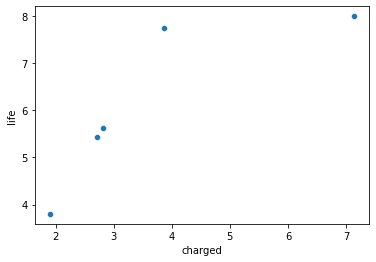

In [17]:
sns.scatterplot(data=dataset, x="charged", y="life")


In [3]:
# Add bias?
dataset.insert(0, "bias", 0)
dataset

,bias,charged,life
0,0,2.81,5.62
1,0,7.14,8.00
2,0,2.72,5.44
3,0,3.87,7.74
4,0,1.90,3.80


In [4]:
# Get independent & dependent variables
X = dataset.iloc[:,0:2].values
Y = dataset.iloc[:,2].values

In [5]:
# Create the linear classifier
pipe = make_pipeline(StandardScaler(), linear_model.LinearRegression())
#model = linear_model.LinearRegression()
pipe.fit(X, Y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [10]:
# Predict new value
timeCharged = 4
result = pipe.predict([[0, timeCharged]])
# result = model.predict({'bias':0, 'charged':timeCharged})
print("Result =", round(result[0],2))

Result = 6.34


#### Hackerrank code stub

In [ ]:
# std in/out code stub
if __name__ == '__main__':
    input = list(input().split())
    print(input)

#### Learning algo using no packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
df = pd.DataFrame({“age”: [22,25,47,52, 46,56,55,60,62,61,18,28,27,29,49,55,25,58,19,18,21,26,40,45,50,54,23], 
                   “bought_insurance”:[0,0,1,0,1,1,0,1,1,1,0,0,0,0,1,1,1,1,0,0,0,0,1,1,1,1,0]})

# Split dataset into two parts: Training, and Testing
test = df.sample(7)
train = df[~df.isin(test)]
train.dropna(inplace = True)

# Activation function
def sigmoid(x):
    return 1/(1+np.exp(-x))

# Loss function
def square_loss(y_pred, target):
    return np.mean(pow((y_pred — target),2))

# Split X (feature) part and y (target) part
X_tr, y_tr = train.age, train[‘bought_insurance’]
X_te, y_te = test.age, test[‘bought_insurance’]

# Model setup and running
lr = 0.01 #learning rate
W = np.random.uniform(0,1) # column 1
b = 0.1
for i in range(10000):
    z = np.dot(X_tr, W) + b

y_pred = sigmoid(z)
l = square_loss(y_pred, y_tr)
gradient_W = np.dot((y_pred-y_tr).T, X_tr)/X_tr.shape[0]
gradient_b = np.mean(y_pred-y_tr)
W = W — lr * gradient_W
b = b — lr* gradient_b